<h2>Importing librarys and data</h2>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

In [2]:
df_yout = pd.read_csv("./data/GBvideos.csv")

In [3]:
#Looking some information of the data
print(df_yout.shape)
print(df_yout.nunique())

(38916, 16)
video_id                   3272
trending_date               205
title                      3369
channel_title              1625
category_id                  16
publish_time               3250
tags                       3122
views                     38393
likes                     30556
dislikes                  11092
comment_count             15778
thumbnail_link             3272
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description                3704
dtype: int64


In [4]:
#Looking for Nulls and type of our data
df_yout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38916 entries, 0 to 38915
Data columns (total 16 columns):
video_id                  38916 non-null object
trending_date             38916 non-null object
title                     38916 non-null object
channel_title             38916 non-null object
category_id               38916 non-null int64
publish_time              38916 non-null object
tags                      38916 non-null object
views                     38916 non-null int64
likes                     38916 non-null int64
dislikes                  38916 non-null int64
comment_count             38916 non-null int64
thumbnail_link            38916 non-null object
comments_disabled         38916 non-null bool
ratings_disabled          38916 non-null bool
video_error_or_removed    38916 non-null bool
description               38304 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.0+ MB


In [5]:
df_yout.head(n=2)

video_id trending_date                                          title  \
0  Jw1Y-zhQURU      17.14.11  John Lewis Christmas Ad 2017 - #MozTheMonster   
1  3s1rvMFUweQ      17.14.11      Taylor Swift: …Ready for It? (Live) - SNL   

         channel_title  category_id              publish_time  \
0           John Lewis           26  2017-11-10T07:38:29.000Z   
1  Saturday Night Live           24  2017-11-12T06:24:44.000Z   

                                                tags    views  likes  \
0  christmas|"john lewis christmas"|"john lewis"|...  7224515  55681   
1  SNL|"Saturday Night Live"|"SNL Season 43"|"Epi...  1053632  25561   

   dislikes  comment_count                                  thumbnail_link  \
0     10247           9479  https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg   
1      2294           2757  https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   

                                         description  
0  Click here to continue the story and make your...  
1  Musical guest Taylor Swift performs …Ready for...

<h2>Let's start looking if Views, likes, dislikes and comment counts have a normal distribuition</h2>

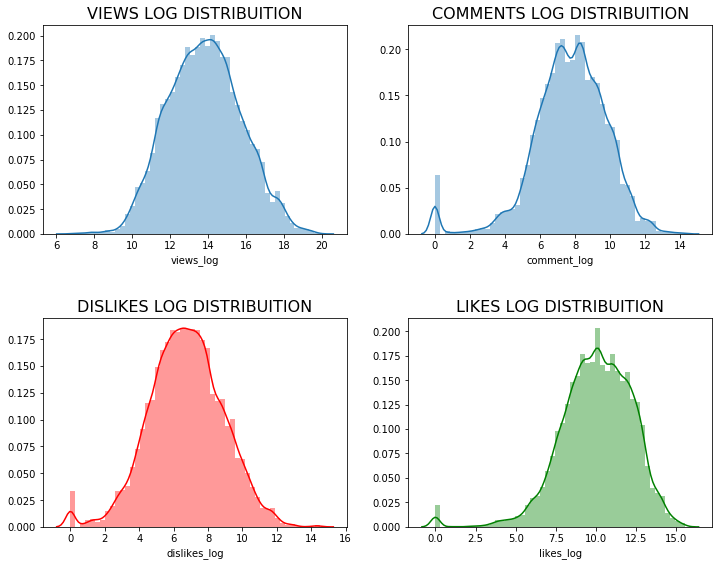

<Figure size 432x288 with 0 Axes>

In [8]:
df_yout['likes_log'] = np.log(df_yout['likes'] + 1)
df_yout['views_log'] = np.log(df_yout['views'] + 1)
df_yout['dislikes_log'] = np.log(df_yout['dislikes'] + 1)
df_yout['comment_log'] = np.log(df_yout['comment_count'] + 1)

plt.figure(figsize = (12,9))

plt.subplot(221)
g1 = sns.distplot(df_yout['views_log'])
g1.set_title("VIEWS LOG DISTRIBUITION", fontsize=16)

plt.subplot(224)
g2 = sns.distplot(df_yout['likes_log'],color='green')
g2.set_title('LIKES LOG DISTRIBUITION', fontsize=16)

plt.subplot(223)
g3 = sns.distplot(df_yout['dislikes_log'], color='r')
g3.set_title("DISLIKES LOG DISTRIBUITION", fontsize=16)

plt.subplot(222)
g4 = sns.distplot(df_yout['comment_log'])
g4.set_title("COMMENTS LOG DISTRIBUITION", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

plt.savefig('numeric_distribution.png')

In [12]:
print("Views quantiles")
print(df_yout['views'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Likes quantiles")
print(df_yout['likes'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Dislikes quantiles")
print(df_yout['dislikes'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Comment quantiles")
print(df_yout['comment_count'].quantile([.01,.25,.5,.75,.99]))

Views quantiles
0.01       17877.15
0.25      251527.25
0.50      981889.00
0.75     3683628.50
0.99    80613152.55
Name: views, dtype: float64

Likes quantiles
0.01         42.00
0.25       5897.00
0.50      25182.50
0.75     114089.25
0.99    1641178.15
Name: likes, dtype: float64

Dislikes quantiles
0.01         1.00
0.25       200.00
0.50       821.00
0.75      3357.50
0.99    113530.55
Name: dislikes, dtype: float64

Comment quantiles
0.01         0.00
0.25       679.00
0.50      2478.00
0.75      9241.50
0.99    182736.65
Name: comment_count, dtype: float64


In [13]:
df_yout['category_name'] = np.nan

df_yout.loc[(df_yout["category_id"] == 1),"category_name"] = 'Film and Animation'
df_yout.loc[(df_yout["category_id"] == 2),"category_name"] = 'Cars and Vehicles'
df_yout.loc[(df_yout["category_id"] == 10),"category_name"] = 'Music'
df_yout.loc[(df_yout["category_id"] == 15),"category_name"] = 'Pets and Animals'
df_yout.loc[(df_yout["category_id"] == 17),"category_name"] = 'Sport'
df_yout.loc[(df_yout["category_id"] == 19),"category_name"] = 'Travel and Events'
df_yout.loc[(df_yout["category_id"] == 20),"category_name"] = 'Gaming'
df_yout.loc[(df_yout["category_id"] == 22),"category_name"] = 'People and Blogs'
df_yout.loc[(df_yout["category_id"] == 23),"category_name"] = 'Comedy'
df_yout.loc[(df_yout["category_id"] == 24),"category_name"] = 'Entertainment'
df_yout.loc[(df_yout["category_id"] == 25),"category_name"] = 'News and Politics'
df_yout.loc[(df_yout["category_id"] == 26),"category_name"] = 'How to and Style'
df_yout.loc[(df_yout["category_id"] == 27),"category_name"] = 'Education'
df_yout.loc[(df_yout["category_id"] == 28),"category_name"] = 'Science and Technology'
df_yout.loc[(df_yout["category_id"] == 29),"category_name"] = 'Non Profits and Activism'
df_yout.loc[(df_yout["category_id"] == 25),"category_name"] = 'News & Politics'

<h2>Looking the Views, likes, dislikes distribuition by category_name's</h2>

Category Name count
Music                 13754
Entertainment          9124
People and Blogs       2926
Film and Animation     2577
How to and Style       1928
Name: category_name, dtype: int64


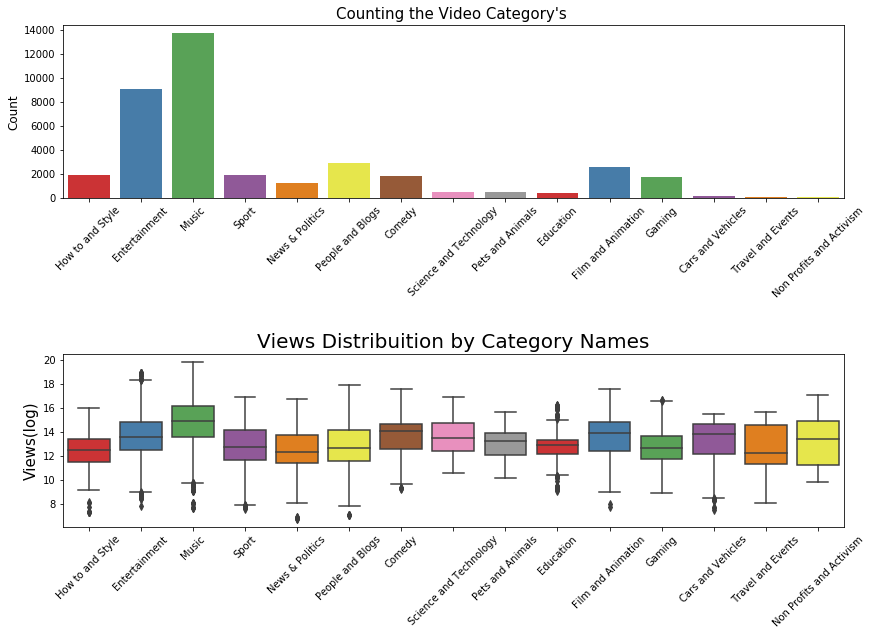

In [14]:
print("Category Name count")
print(df_yout.category_name.value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot('category_name', data=df_yout, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting the Video Category's ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)

plt.subplot(212)
g1 = sns.boxplot(x='category_name', y='views_log', data=df_yout, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Views Distribuition by Category Names", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Views(log)", fontsize=15)

plt.subplots_adjust(hspace = 0.9, top = 0.9)

plt.show()



Significant number of politics and news videos.

The unique difference is in Non Profits and Activism videos that have less views than the "normal" videos


<h2>Looking the Views, likes, dislikes distribuition by category_name's</h2>

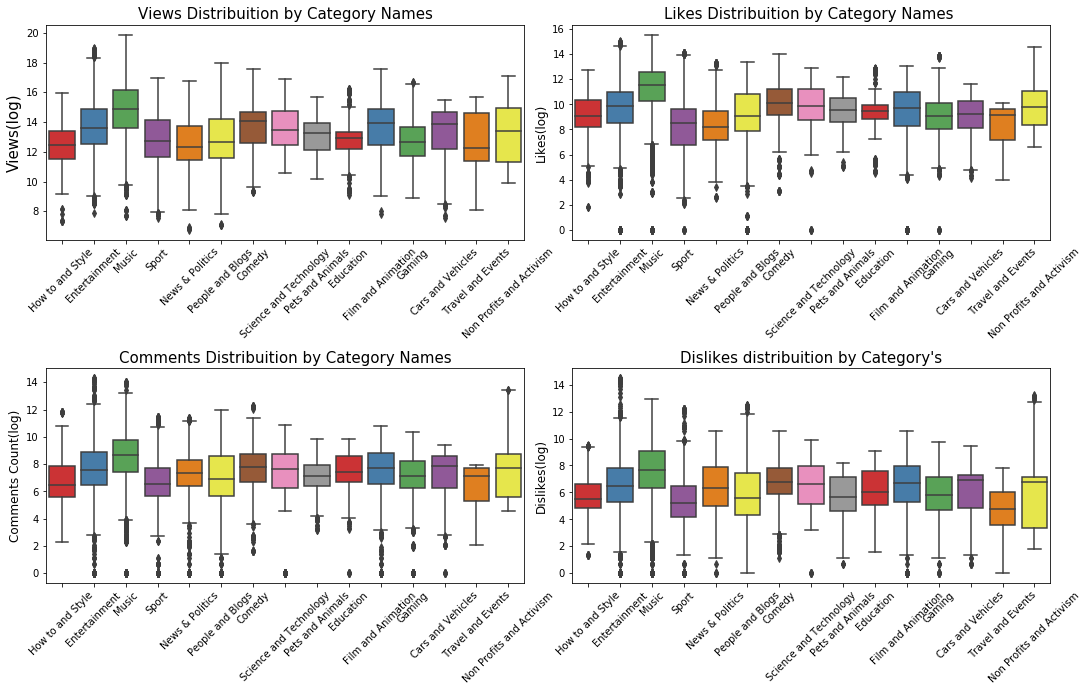

In [33]:
fig = plt.figure(figsize = (18,10))

plt.subplot(221)
g1 = sns.boxplot(x='category_name', y='views_log', data=df_yout, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Views Distribuition by Category Names", fontsize=15)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Views(log)", fontsize=15)

plt.subplot(222)
g2 = sns.boxplot(x='category_name', y='likes_log', data=df_yout, palette="Set1")
g2.set_xticklabels(g.get_xticklabels(),rotation=45)
g2.set_title("Likes Distribuition by Category Names ", fontsize=15)
g2.set_xlabel("", fontsize=12)
g2.set_ylabel("Likes(log)", fontsize=12)

plt.subplot(223)
g3 = sns.boxplot(x='category_name', y='comment_log', data=df_yout, palette="Set1")
g3.set_xticklabels(g.get_xticklabels(),rotation=45)
g3.set_title("Comments Distribuition by Category Names", fontsize=15)
g3.set_xlabel("", fontsize=12)
g3.set_ylabel("Comments Count(log)", fontsize=12)

plt.subplot(224)
g4 = sns.boxplot(x='category_name', y='dislikes_log', data=df_yout, palette="Set1")
g4.set_xticklabels(g.get_xticklabels(),rotation=45)
g4.set_title("Dislikes distribuition by Category's", fontsize=15)
g4.set_xlabel("", fontsize=12)
g4.set_ylabel("Dislikes(log)", fontsize=12)

plt.subplots_adjust(wspace = 0.1, hspace = 0.6,top = 0.9)
plt.show()

fig.savefig('category_desc.png')

News and Politics have a the same of Non Profits of engagement likes

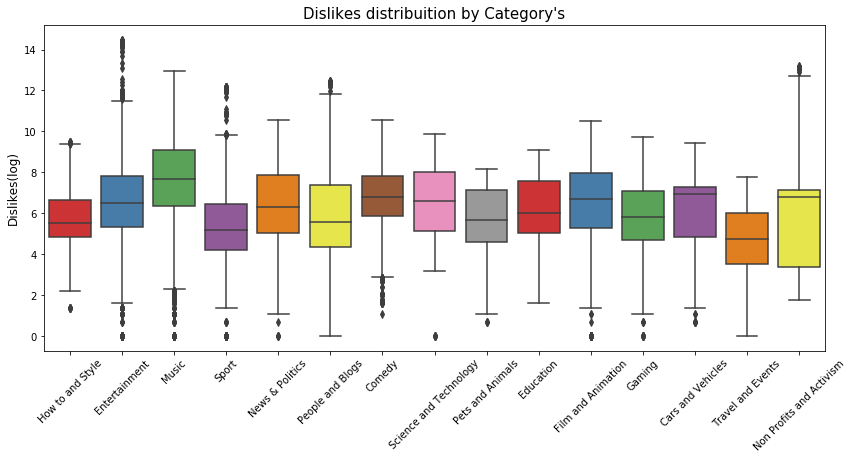

In [12]:
plt.figure(figsize = (14,6))



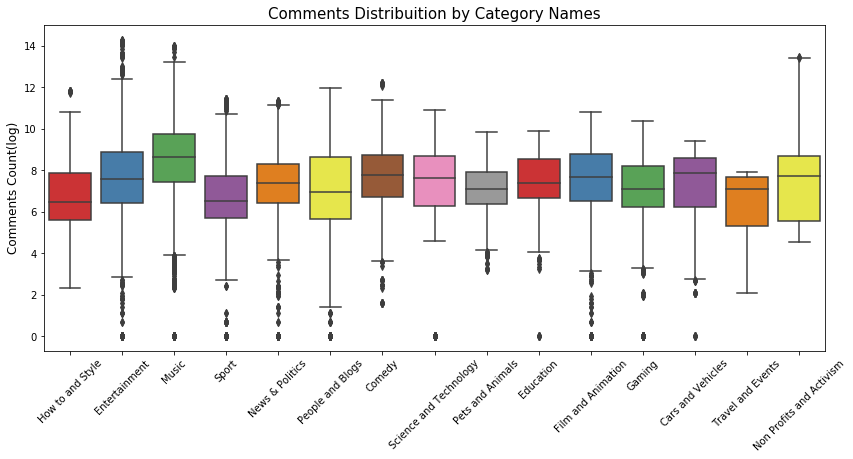

In [13]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='comment_log', data=df_yout, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Comments Distribuition by Category Names", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Comments Count(log)", fontsize=12)

plt.show()

<h1>Engagement Features </h1>

I will create some new variables to us analyse the percent of likes, dislikes, comment by each category to discover what category have the highest engagement

In [14]:
df_yout['like_rate'] =  df_yout ['likes'] / df_yout['views'] * 100
df_yout['dislike_rate'] =  df_yout ['dislikes'] / df_yout['views'] * 100
df_yout['comment_rate'] =  df_yout ['comment_count'] / df_yout['views'] * 100

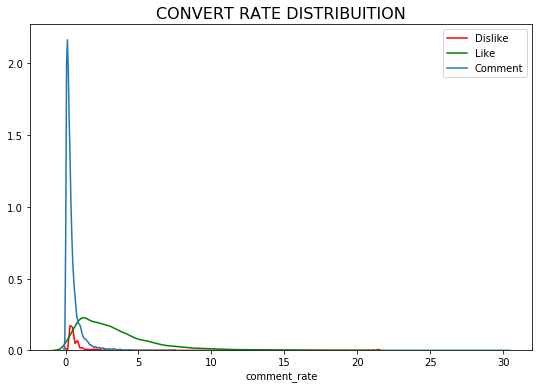

In [15]:
plt.figure(figsize = (9,6))

g1 = sns.distplot(df_yout['dislike_rate'], color='red',hist=False, label="Dislike")
g1 = sns.distplot(df_yout['like_rate'], color='green',hist=False, label="Like")
g1 = sns.distplot(df_yout['comment_rate'],hist=False,label="Comment")
g1.set_title('CONVERT RATE DISTRIBUITION', fontsize=16)
plt.legend()
plt.show()

Very meaningful distribuition! Like x Dislikes rate have interesting differences

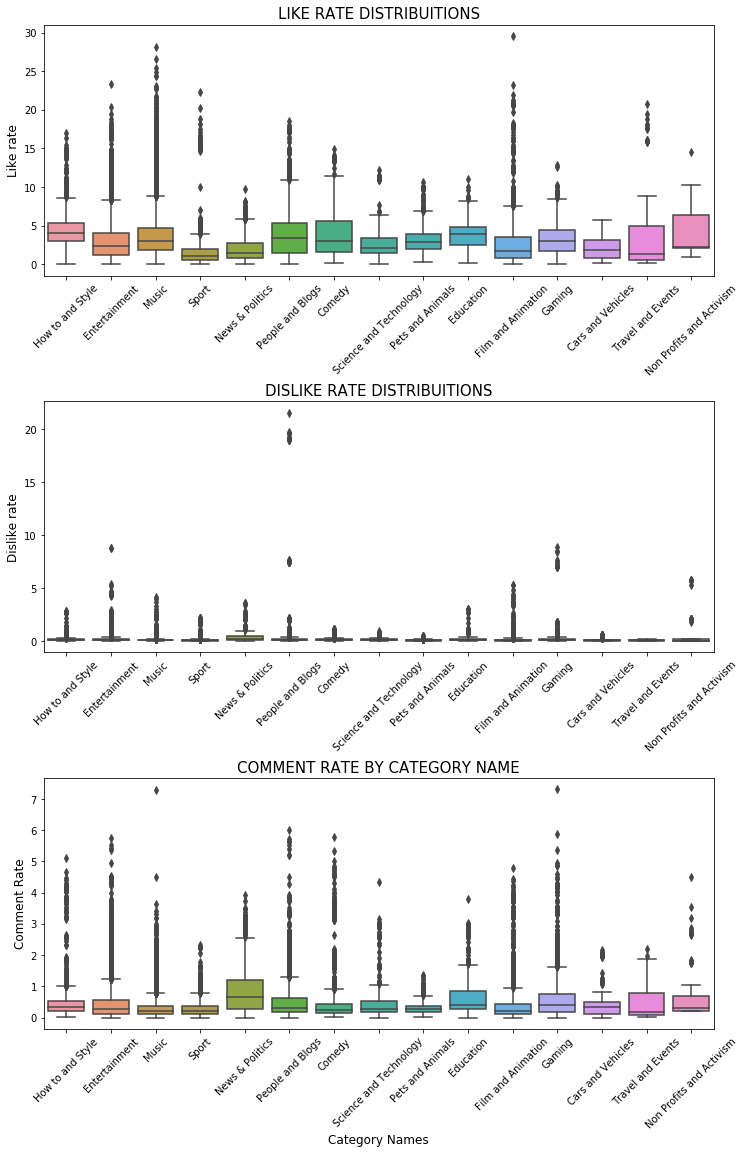

In [16]:
plt.figure(figsize = (12,18))

plt.subplot(311)
g= sns.boxplot(x='category_name',y='like_rate',  data=df_yout)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("LIKE RATE DISTRIBUITIONS", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Like rate", fontsize=12)

plt.subplot(312)
g1= sns.boxplot(y='dislike_rate', x='category_name', data=df_yout)
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("DISLIKE RATE DISTRIBUITIONS", fontsize=15)
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Dislike rate", fontsize=12)

plt.subplot(313)
g2= sns.boxplot(y='comment_rate', x='category_name', data=df_yout)
g2.set_xticklabels(g.get_xticklabels(),rotation=45)
g2.set_title("COMMENT RATE BY CATEGORY NAME", fontsize=15)
g2.set_xlabel("Category Names", fontsize=12)
g2.set_ylabel("Comment Rate", fontsize=12)

plt.subplots_adjust(wspace = 0.2, hspace = 0.5,top = 0.9)

plt.show()

We can see that the Dislike rate is very low in almost all categories but some outliers in 'People and Blogs' and News & Politics that we can might can consider "Normal"

The mean of ike distribuition is less than 5% but in music we have a very interesting pattern of like rate... The music category have the highest engagement rate.

And at the Comment rate we can see the how-to category with the highest rates of commments. Interesting because isn't politics LOL

<h2>Let's look the kde of this variables separated to deep understand them</h2>

/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


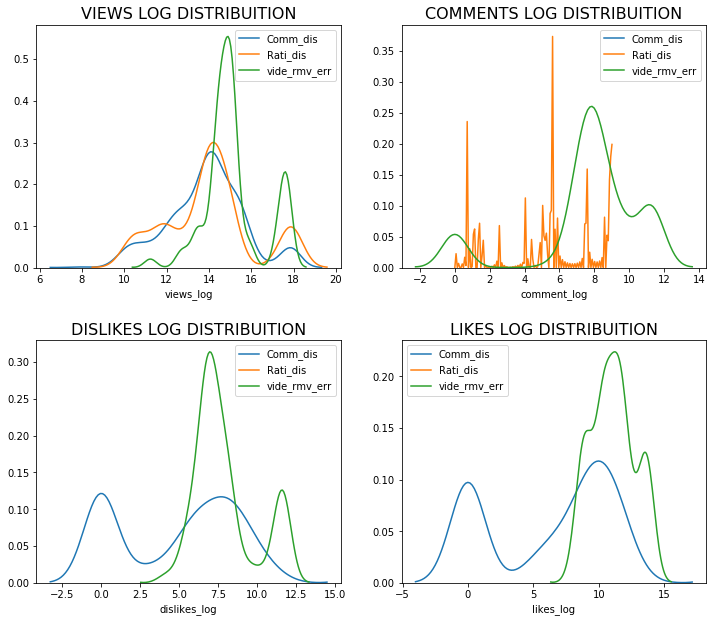

In [18]:
plt.figure(figsize = (12,10))

plt.subplot(221)
g1 = sns.distplot(df_yout[df_yout['comments_disabled'] == True]['views_log'], 
                  hist=False, label='Comm_dis')
g1 = sns.distplot(df_yout[df_yout['ratings_disabled'] == True]['views_log'], 
                  hist=False, label='Rati_dis')
g1 = sns.distplot(df_yout[df_yout['video_error_or_removed'] == True]['views_log'], 
                  hist=False, label='vide_rmv_err')
g1.set_title("VIEWS LOG DISTRIBUITION", fontsize=16)

plt.subplot(222)
g4 = sns.distplot(df_yout[df_yout['comments_disabled'] == True]['comment_log'],
                  hist=False, label='Comm_dis')
g4 = sns.distplot(df_yout[df_yout['ratings_disabled'] == True]['comment_log'], 
                  hist=False, label='Rati_dis')
g4 = sns.distplot(df_yout[df_yout['video_error_or_removed'] == True]['comment_log'], 
                  hist=False, label='vide_rmv_err')
g4.set_title("COMMENTS LOG DISTRIBUITION", fontsize=16)

plt.subplot(223)
g3 = sns.distplot(df_yout[df_yout['comments_disabled'] == True]['dislikes_log'], 
                  hist=False, label='Comm_dis')
g3 = sns.distplot(df_yout[df_yout['ratings_disabled'] == True]['dislikes_log'], 
                  hist=False, label='Rati_dis')
g3 = sns.distplot(df_yout[df_yout['video_error_or_removed'] == True]['dislikes_log'], 
                  hist=False, label='vide_rmv_err')
g3.set_title("DISLIKES LOG DISTRIBUITION", fontsize=16)

plt.subplot(224)
g2 = sns.distplot(df_yout[df_yout['comments_disabled'] == True]['likes_log'], 
                  hist=False, label='Comm_dis')
g2 = sns.distplot(df_yout[df_yout['ratings_disabled'] == True]['likes_log'], 
                  hist=False, label='Rati_dis')
g2 = sns.distplot(df_yout[df_yout['video_error_or_removed'] == True]['likes_log'], 
                  hist=False, label='vide_rmv_err')
g2.set_title('LIKES LOG DISTRIBUITION', fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.3,top = 0.9)
plt.legend()
plt.show()

Removed videos no have some views until be moreved... <br>Rating disable and Comments disable have the same distribuition 

<h2>Analysing the Correlation Matrix of the numerical variables</h2>

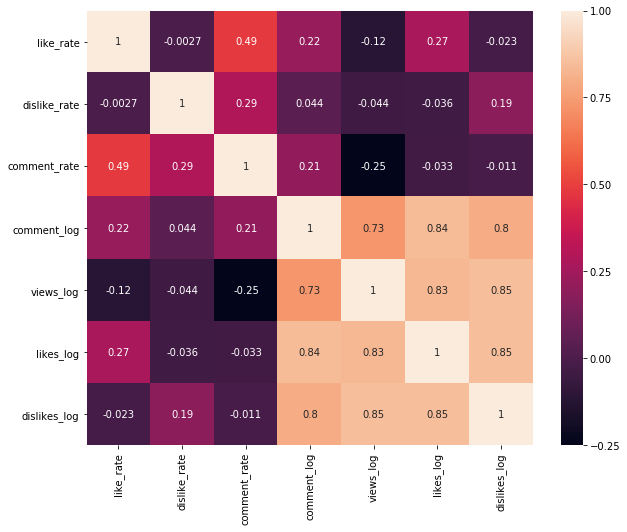

In [19]:
plt.figure(figsize = (10,8))

#Let's verify the correlation of each value
sns.heatmap(df_yout[['like_rate', 'dislike_rate', 'comment_rate', 'comment_log',
         'views_log','likes_log','dislikes_log', "category_name"]].corr(), annot=True)
plt.show()

<h2>I will start creating some features from texts using Title and Tags columns</h2>

In [34]:
#nlp
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords
import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
# Tweet tokenizer does not split at apostophes which is what we want
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer   

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zeming/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [35]:
#Setting the stopwords
eng_stopwords = set(stopwords.words("english"))


In [36]:
#Word count in each comment:
df_yout['count_word']=df_yout["title"].apply(lambda x: len(str(x).split()))
df_yout['count_word_tags']=df_yout["tags"].apply(lambda x: len(str(x).split()))

#Unique word count
df_yout['count_unique_word']=df_yout["title"].apply(lambda x: len(set(str(x).split())))
df_yout['count_unique_word_tags']=df_yout["tags"].apply(lambda x: len(set(str(x).split())))

#Letter count
df_yout['count_letters']=df_yout["title"].apply(lambda x: len(str(x)))
df_yout['count_letters_tags']=df_yout["tags"].apply(lambda x: len(str(x)))

#punctuation count
df_yout["count_punctuations"] =df_yout["title"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
df_yout["count_punctuations_tags"] =df_yout["tags"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
df_yout["count_words_upper"] = df_yout["title"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
df_yout["count_words_upper_tags"] = df_yout["tags"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
df_yout["count_words_title"] = df_yout["title"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
df_yout["count_words_title_tags"] = df_yout["tags"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
df_yout["count_stopwords"] = df_yout["title"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
df_yout["count_stopwords_tags"] = df_yout["tags"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

#Average length of the words
df_yout["mean_word_len"] = df_yout["title"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
df_yout["mean_word_len_tags"] = df_yout["tags"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [37]:
#derived features
#Word count percent in each comment:
df_yout['word_unique_percent']=df_yout['count_unique_word']*100/df_yout['count_word']
df_yout['word_unique_percent_tags']=df_yout['count_unique_word_tags']*100/df_yout['count_word_tags']

#Punct percent in each comment:
df_yout['punct_percent']=df_yout['count_punctuations']*100/df_yout['count_word']
df_yout['punct_percent_tags']=df_yout['count_punctuations_tags']*100/df_yout['count_word_tags']

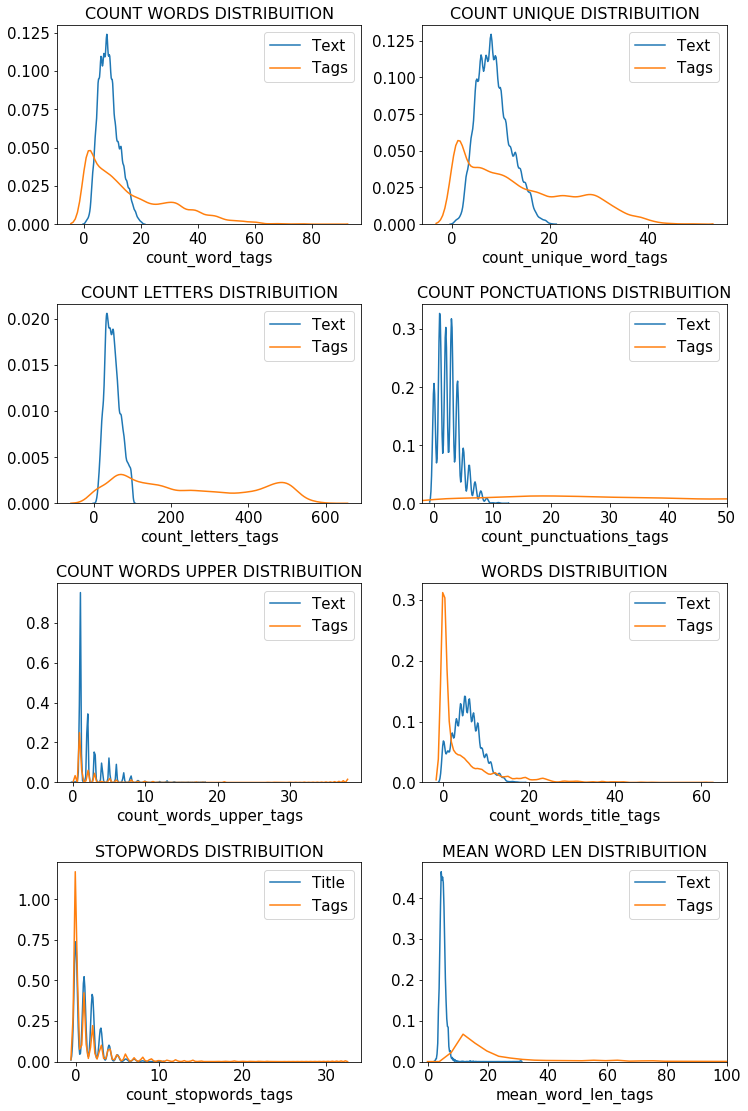

In [38]:
plt.figure(figsize = (12,18))

plt.subplot(421)
g1 = sns.distplot(df_yout['count_word'], 
                  hist=False, label='Text')
g1 = sns.distplot(df_yout['count_word_tags'], 
                  hist=False, label='Tags')
g1.set_title("COUNT WORDS DISTRIBUITION", fontsize=16)

plt.subplot(422)
g2 = sns.distplot(df_yout['count_unique_word'],
                  hist=False, label='Text')
g2 = sns.distplot(df_yout['count_unique_word_tags'], 
                  hist=False, label='Tags')
g2.set_title("COUNT UNIQUE DISTRIBUITION", fontsize=16)

plt.subplot(423)
g3 = sns.distplot(df_yout['count_letters'], 
                  hist=False, label='Text')
g3 = sns.distplot(df_yout['count_letters_tags'], 
                  hist=False, label='Tags')
g3.set_title("COUNT LETTERS DISTRIBUITION", fontsize=16)

plt.subplot(424)
g4 = sns.distplot(df_yout["count_punctuations"], 
                  hist=False, label='Text')
g4 = sns.distplot(df_yout["count_punctuations_tags"], 
                  hist=False, label='Tags')
g4.set_xlim([-2,50])
g4.set_title('COUNT PONCTUATIONS DISTRIBUITION', fontsize=16)

plt.subplot(425)
g5 = sns.distplot(df_yout["count_words_upper"] , 
                  hist=False, label='Text')
g5 = sns.distplot(df_yout["count_words_upper_tags"] , 
                  hist=False, label='Tags')
g5.set_title('COUNT WORDS UPPER DISTRIBUITION', fontsize=16)

plt.subplot(426)
g6 = sns.distplot(df_yout["count_words_title"], 
                  hist=False, label='Text')
g6 = sns.distplot(df_yout["count_words_title_tags"], 
                  hist=False, label='Tags')
g6.set_title('WORDS DISTRIBUITION', fontsize=16)

plt.subplot(427)
g7 = sns.distplot(df_yout["count_stopwords"], 
                  hist=False, label='Title')
g7 = sns.distplot(df_yout["count_stopwords_tags"], 
                  hist=False, label='Tags')
g7.set_title('STOPWORDS DISTRIBUITION', fontsize=16)

plt.subplot(428)
g8 = sns.distplot(df_yout["mean_word_len"], 
                  hist=False, label='Text')
g8 = sns.distplot(df_yout["mean_word_len_tags"], 
                  hist=False, label='Tags')
g8.set_xlim([-2,100])
g8.set_title('MEAN WORD LEN DISTRIBUITION', fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)
plt.legend()
plt.show()

<h2>Have the Punctuations title and tags any relation with views, likes, dislikes comments? </h2>

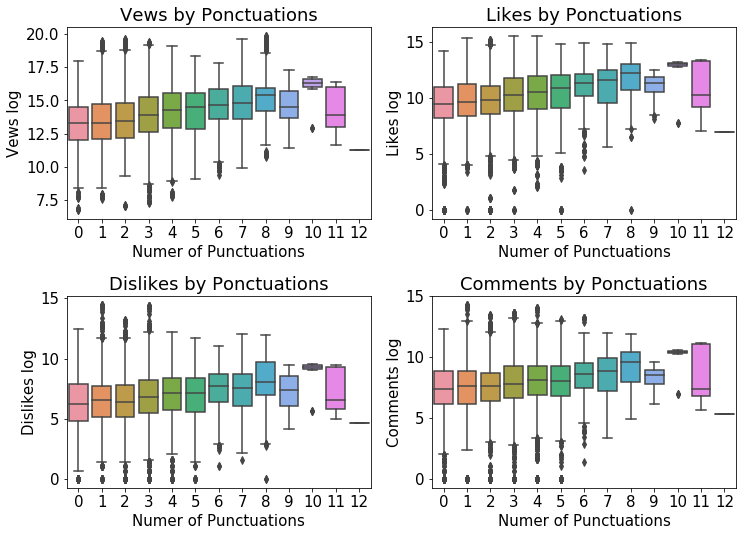

In [39]:
plt.figure(figsize = (12,8))

plt.subplot(221)
g=sns.boxplot(x='count_punctuations', y='views_log',data=df_yout)
g.set_title("Vews by Ponctuations")
g.set_xlabel("Numer of Punctuations")
g.set_ylabel("Vews log")

plt.subplot(222)
g1 = sns.boxplot(x='count_punctuations', y='likes_log',data=df_yout)
g1.set_title("Likes by Ponctuations")
g1.set_xlabel("Numer of Punctuations")
g1.set_ylabel("Likes log")

plt.subplot(223)
g2 = sns.boxplot(x='count_punctuations', y='dislikes_log',data=df_yout)
g2.set_title("Dislikes by Ponctuations")
g2.set_xlabel("Numer of Punctuations")
g2.set_ylabel("Dislikes log")

plt.subplot(224)
g3 = sns.boxplot(x='count_punctuations', y='comment_log',data=df_yout)
g3.set_title("Comments by Ponctuations")
g3.set_xlabel("Numer of Punctuations")
g3.set_ylabel("Comments log")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

<h2>The same view using Tags punctuations values</h2>

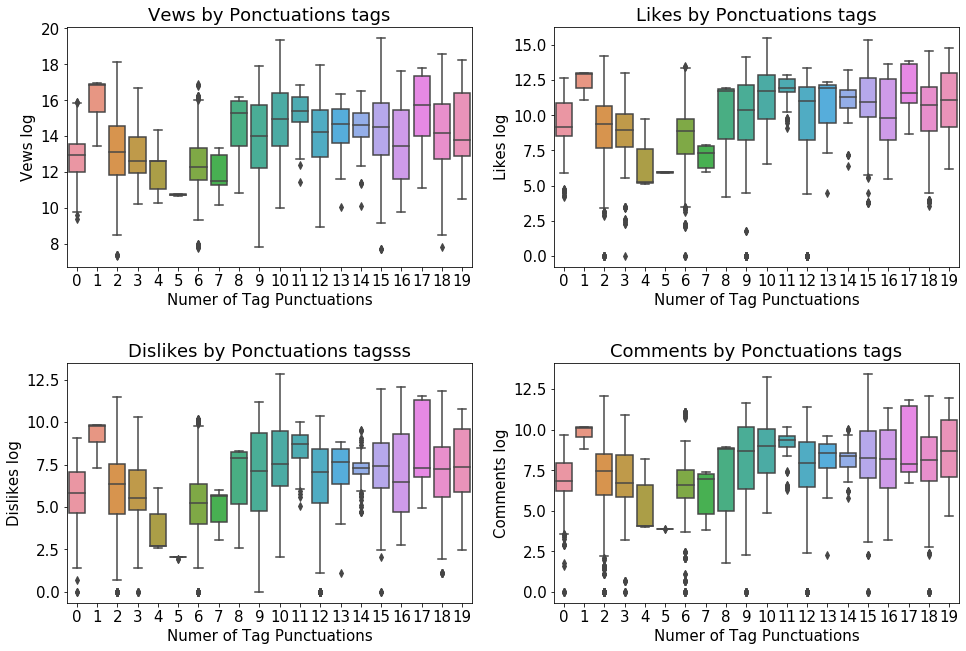

In [43]:
plt.figure(figsize = (16,10))

plt.subplot(221)
g=sns.boxplot(x='count_punctuations_tags', y='views_log',data=df_yout[df_yout['count_punctuations_tags'] < 20])
g.set_title("Vews by Ponctuations tags")
g.set_xlabel("Numer of Tag Punctuations")
g.set_ylabel("Vews log")

plt.subplot(222)
g1 = sns.boxplot(x='count_punctuations_tags', y='likes_log',data=df_yout[df_yout['count_punctuations_tags'] < 20])
g1.set_title("Likes by Ponctuations tags")
g1.set_xlabel("Numer of Tag Punctuations")
g1.set_ylabel("Likes log")

plt.subplot(223)
g2 = sns.boxplot(x='count_punctuations_tags', y='dislikes_log',data=df_yout[df_yout['count_punctuations_tags'] < 20])
g2.set_title("Dislikes by Ponctuations tagsss")
g2.set_xlabel("Numer of Tag Punctuations")
g2.set_ylabel("Dislikes log")

plt.subplot(224)
g3 = sns.boxplot(x='count_punctuations_tags', y='comment_log',data=df_yout[df_yout['count_punctuations_tags'] < 20])
g3.set_title("Comments by Ponctuations tags")
g3.set_xlabel("Numer of Tag Punctuations")
g3.set_ylabel("Comments log")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

<h2>Let's verify the correlation of title and tags values with views</h2>
- exploring the Correlation matrix to see if have any interesting relation

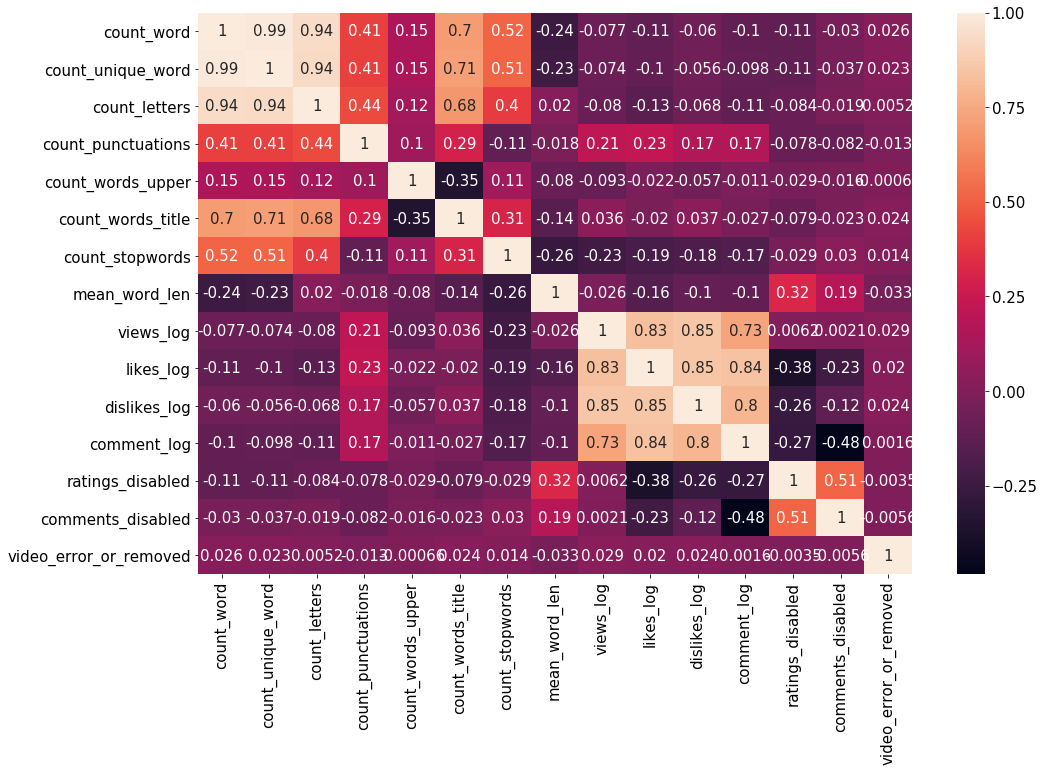

In [42]:
plt.figure(figsize = (16,10))

sns.heatmap(df_yout[['count_word', 'count_unique_word','count_letters',
                     "count_punctuations","count_words_upper", "count_words_title", 
                     "count_stopwords","mean_word_len", 
                     'views_log', 'likes_log','dislikes_log','comment_log',
                     'ratings_disabled', 'comments_disabled', 'video_error_or_removed']].corr(), annot=True)
plt.show()

In [44]:
df_yout['publish_time'] = pd.to_datetime(df_yout['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

Category Name count
1     6331
12    6322
2     6208
3     5453
11    4748
Name: month, dtype: int64
/usr/local/lib/python3.7/site-packages/seaborn/categorical.py:2612: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


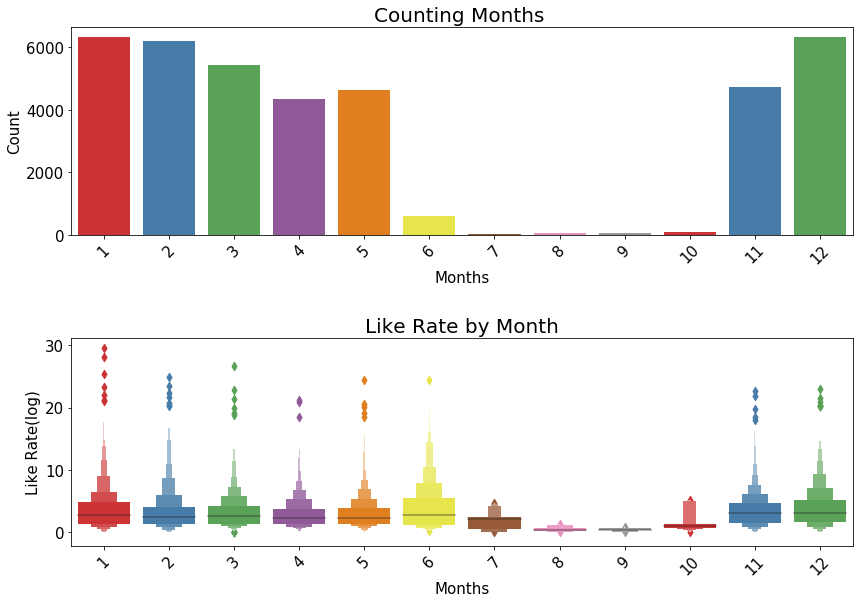

In [45]:
df_yout['month'] = df_yout['publish_time'].dt.month

print("Category Name count")
print(df_yout['month'].value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot('month', data=df_yout, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting Months ", fontsize=20)
g.set_xlabel("Months", fontsize=15)
g.set_ylabel("Count", fontsize=15)

plt.subplot(212)
g1 = sns.lvplot(x='month', y='like_rate', data=df_yout, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Like Rate by Month", fontsize=20)
g1.set_xlabel("Months", fontsize=15)
g1.set_ylabel("Like Rate(log)", fontsize=15)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()

## Let's extract the hour value of datetime'

In [46]:
# separates date and time into two columns from 'publish_time' column
df_yout.insert(4, 'publish_date', df_yout['publish_time'].dt.date)
df_yout['publish_time'] = df_yout['publish_time'].dt.time
df_yout[['hour','min','sec']] = df_yout['publish_time'].astype(str).str.split(':', expand=True).astype(int)

## Knowning the Hour feature

TOP 5 Hour values
17    3410
16    3231
15    3014
14    2372
18    2281
Name: hour, dtype: int64


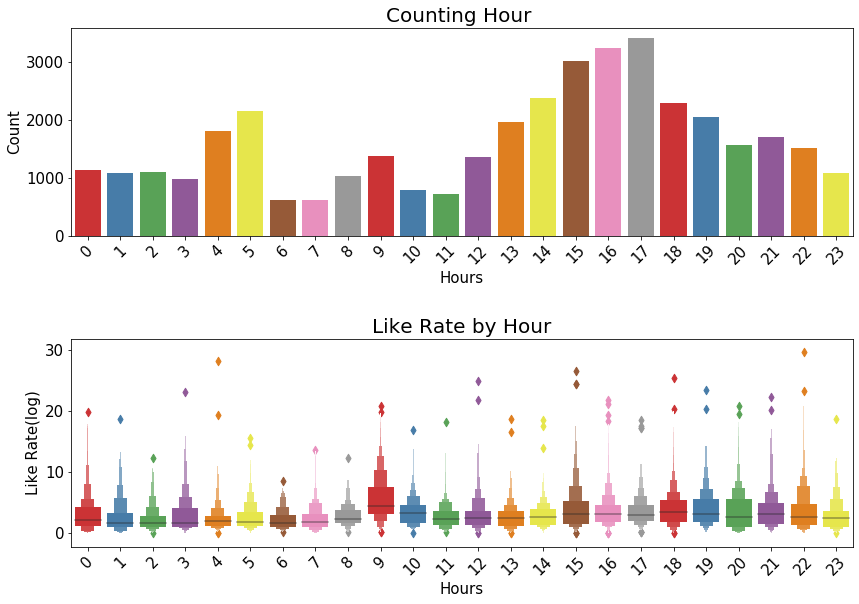

In [47]:
print("TOP 5 Hour values")
print(df_yout['hour'].value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot('hour', data=df_yout, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting Hour ", fontsize=20)
g.set_xlabel("Hours", fontsize=15)
g.set_ylabel("Count", fontsize=15)

plt.subplot(212)
g1 = sns.lvplot(x='hour', y='like_rate', data=df_yout, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Like Rate by Hour", fontsize=20)
g1.set_xlabel("Hours", fontsize=15)
g1.set_ylabel("Like Rate(log)", fontsize=15)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()